## Software and data to be used in structure formation lectures 

### Andrey Kravtsov

#### The University of Chicago 

#### email: kravtsov@uchicago.edu


During my lectures on "Theory and simulations of structure formation" at the <a href="https://www.astrosoma.org/">ASTROSOMA 2019</a> summer school in Moscow on July 1-5, 2019, I will use <a href="">Jupyter notebooks</a> to produce slides. Notebooks with additional information will also constitute reading and background material for my lectures. 

In addition, exercises that I will suggest for practical sessions on Monday, Wednesday, and Thursday of the first week of the school will also use these packages and data.

### Github repository

I will collect notebooks, codes, data and auxiliary files in the github repository: 

<a href="https://github.com/a-kravtsov/astrosoma19"><tt>https://github.com/a-kravtsov/astrosoma19</tt></a>.

The preferred way is for you to clone the repository to your laptop and then use git command <tt>pull</tt> to update your local repository to bring any changes I introduce to your local version, as described <a href="https://help.github.com/en/articles/fetching-a-remote">here</a>. 

### LaTeX

Although not strictly required, I highly recommend installing <a href="https://www.latex-project.org/get/">a LaTeX distribution</a> on your laptop. I use LaTeX commands to format plot labels in matplotlib. 

If you will not have LaTeX or your installation creates issues when python is run, you can set <tt>usetex</tt> to False in the plot setup line

        plt.rc('text', usetex=True)

that can be found in <tt>code/plot_utils.py</tt> subdirectory of my <a href="https://github.com/a-kravtsov/astrosoma19">github repository</a>.

### Python distributions and version

You should have <a href="https://www.continuum.io/downloads">Anaconda</a> Python 3 version  installed on your laptop (I am using Python 3.7.1, numpy 1.16.4, scipy 1.3.0 during development, although in principle code should work with other versions, including Python 2.7).

If you use <a href="https://www.enthought.com/products/canopy/">Enthought Canopy</a> python distribution, you should be able to use materials as well. 

Both Enthought and Anaconda will provide similar capabilities, although the way you interact with packages is somewhat different. Anaconda will come with most packages you need pre-installed, while in Enthought you will need to install some additional packages.


In a given python distro, you can launch Jupyter notebook by loading a notebook file or starting a new notebook using IDE editor (specific to each distro) or via command line: <tt>jupyter notebook notebook_name.ipynb</tt> in the directory in which notebook is located, which will open the notebook in a browser where it can be edited and executed.  

### Additional required python packages

To run code in my notebooks, in addition  to  standard libraries that come with the distributions: matplotlib, numpy, scipy, you should install the following packages: 

<a href="http://www.astropy.org/"><tt>astropy</tt></a> - some astropy I/O routines are used by some of the code, mostly to read FITS files. 

<a href="https://bitbucket.org/bdiemer/colossus/overview"><tt>colossus</tt></a> -  python package developed by Benedikt Diemer. Colossus contains useful routines for computing various cosmological quantities (distances, variances, power spectra, halo profiles, etc.) that I will be using in my code extensively. Its installation is very simple; see <a href="https://bdiemer.bitbucket.io/colossus/installation.html">installation instructions</a>. 

### Data

In addition to small data files that I will be adding to <tt>data/</tt> subdirectory in the repository, you should download the following larger data set. 

### The UPenn version of the SDSS catalog

We will use a <a href="http://www.physics.upenn.edu/~ameert/SDSS_PhotDec/download/">UPenn version of the SDSS spectroscopic catalog</a> with improved photometry for the SDSS DR7 sample created by <a href="https://www.physics.upenn.edu/people/standing-faculty/mariangela-bernardi">Mariangela Bernardi</a> (UPenn), her former PhD student <a href="http://alan-meert-website-aws.s3-website-us-east-1.amazonaws.com/index.html">Alan Meert</a>, and their collaborators (<a href="http://adsabs.harvard.edu/abs/2015MNRAS.446.3943M">Meert et al. 2015</a>). 

The catalog files can be found  in <a href="https://uchicago.box.com/s/h2egx5ui1b3bpqiqqnktbrjbkum7tbct">this directory</a>. You should download data files in subdirectory <tt>data/Meert2015_v2</tt> within your local repository copy. 

The UPenn catalog comes as a collection of FITS files. Routine for reading them is provided in the file <tt>code/read_data.py</tt> in the repository and you can find example code below that shows how the catalog is read and how some cuts are applied to derive a clean sample of galaxies and how these can be plotted to reveal the large-scale structure in galaxy distribution. 

The file <tt>data_tables</tt> in this subdirectory contains description of the information contained in the catalog (some of it duplicates from the SDSS catalogs, but much of it is new). 

### You can check whether everything works by running code below

In [1]:
# Preliminaries: set up plotting parameters
import numpy as np

# allow automatic reload of imported codes, if they are modified
%load_ext autoreload
%autoreload 2

# setup notebook for inline figures
%matplotlib inline
import matplotlib.pyplot as plt

# setup matplotlib parameters to make nicer plots
from code.plot_utils import plot_pretty

# you may need to adjust dpi parameter for your screen resolution
plot_pretty(dpi=200)

### Computing cosmological distances

The test below uses independent routines in the <tt>code/</tt> subdirectory and in the Colossus package to compute and plot angular diameter, $d_{\rm A}$, and luminosity, $d_{\rm L}$, distances related by 

$$
d_{\rm L} = (1+z)\,d_{\rm M} = (1+z)^2\,d_{\rm A}.
$$

as a function of redshift $z$. 

You can find background information on the Friedmann equations and cosmological distances in the notebook <a href="bg01_friedmann_equations_distances.ipynb">bg01_friedmann_equations_distances.ipynb</a>  in the repository. 

The test allows you to check functionality of the codes in the repository and correct installation of the Colossus package. 

In [2]:
from code.cosmology import d_l, d_a

In [3]:
z = 0.1; Om0 = 0.3; OmL = 1. - Om0
d_H = 2997.92
print("z = %.2f; Om0 = %.2f; Oml = %.2f:"%(z, Om0, OmL))
print("d_L = %.3e /h Mpc; d_A = %.3e /h Mpc"%(d_H*d_l(z, Om0, OmL), d_H*d_a(z, Om0, OmL)))


z = 0.10; Om0 = 0.30; Oml = 0.70:
d_L = 3.222e+02 /h Mpc; d_A = 2.663e+02 /h Mpc


In [4]:
zmin = 0.01; zmax = 10.; nz = 100
z = np.linspace(zmin, zmax, nz)

dL = np.zeros_like(z); dA = np.zeros_like(z)
for i, zd in enumerate(z):
    dL[i] = d_l(zd, Om0, OmL)
    dA[i] = dL[i]/(1.+zd)**2
    
# convert to /h Mpc
dL *= d_H; dA *= d_H

Here is how to use the distance routine in the vectorized way. In this case, for many points the routine computing comoving los distance constructs cubic spline and then uses this spline to compute distances quickly for all points. This will be handy and efficient when we will need to evaluate distances for hundreds of thousands of galaxies in the SDSS. 

In [5]:
# when called with a vector z of size larger than ninter, routine computes distances 
# using cubic spline constructed over [zmin, zmax] interval of z

dLv = d_l(z, Om0, OmL, ninter=20)
dAv = dLv/(1.+z)**2
    
# convert to /h Mpc
dLv *= d_H; dAv *= d_H

Here we will compute luminosity distance using corresponding <a href="https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#cosmology.cosmology.Cosmology.luminosityDistance">Colossus routine</a>, which will check your installation of Colossus.

In [6]:
from colossus.cosmology import cosmology

params = {'flat': True, 'H0': 70., 'Om0': Om0, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
cosmo = cosmology.setCosmology('my_flat_lcdm', params)

dLc = cosmo.luminosityDistance(z)

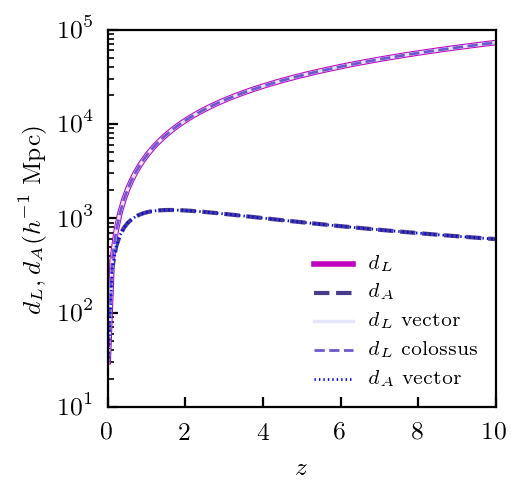

In [11]:
plot_pretty(dpi=200)
# now plot the fractional error as a function of step size
plt.figure(figsize=(2.5,2.5))
plt.xlabel('$z$'); plt.ylabel(r'$d_L, d_A (h^{-1}\ {\rm Mpc})$')
#plt.xscale('log'); 
plt.yscale('log')

plt.xlim([zmin,zmax]); plt.ylim(10.,1.e5)

plt.plot(z, dL, linewidth=2, c='m', label='$d_L$')
plt.plot(z, dA, linewidth=1.5, ls='--', c='darkslateblue', label='$d_A$')
plt.plot(z, dLv, linewidth=1.25, c='lavender', label='$d_L\ \mathrm{vector}$')
plt.plot(z, dLc, linewidth=1., ls='--', c='slateblue', label='$d_L\ \mathrm{colossus}$')
plt.plot(z, dA, linewidth=1., ls =':', c='blue', label='$d_A\ \mathrm{vector}$')

plt.legend(loc='lower right', frameon=False, fontsize=7)
plt.show()

Note the peculiar behavior of $d_A$ with increasing $z$ at $z>1$. 

### Reading SDSS galaxy data from the UPenn catalog



In [12]:
from code.read_data import read_meert_catalog
# input phot_type selects photometry model fit:  1=best fit, 2=deVaucouleurs, 3=Sersic, 
# 4=DeVExp, 5=SerExp
datadir = r'data/Meert2015_v2/'
sdata, mdata, mnpdata, phot_r, mdatag, mnpdatag, morph = read_meert_catalog(datadir, phot_type=1)

670722 galaxies in Meert et al. sample initially


In [13]:
# pre-select galaxies in the SDSS Great Wall region using RA, Dec, and redshift cuts
isel = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
        (sdata['ra'] > 80) & (sdata['ra'] < 280) & 
        (sdata['z'] > 0.01) & (sdata['z'] < 0.14) )

#sdata = sdata[isel]; mdata = mdata[isel]; 
# extract data into numpy vectors for convenience
ram = sdata['ra'][isel]
zm = sdata['z'][isel]; mmeert = mdata['m_tot'][isel]
extm = mnpdata['extinction'][isel]; kcorr = mnpdata['kcorr'][isel]

In [14]:
# luminosity distance in Mpc
from code.cosmology import d_l

Om0 = 0.3; OmL = 1. - Om0
h = 0.7 # H0/100
d_H = 2997.92 # c/(100 km/s/Mpc) 

d_Lm = d_l(zm, Om0, OmL, ninter=20)

# dimensionless distance -> Mpc 
d_Lm *= d_H / h
# absolute magnitude in the r-band corrected for extinction and k-correction
Mmeert = mmeert - 5.0*np.log10(d_Lm) - 25. - extm - kcorr; 

Let's now use r-band absolute magnitude to additionally select only galaxies brighter than Mlim absolute magnitude

In [15]:
def plot_selected(ra, d_C, title=' ', figsize=(6,3), s=0.5, color='k'):
    """
    Plot distribution of SDSS galaxies in a narrow range of declinations
    
    Parameters:
    -----------
    
    ra:  float vector of right ascensions in degrees
    d_C: float vector of comoving distances in Mpc 
    
    the rest are parameters for plotting: string title of the plot, figure size
    point size, and point color

    """

    # construct 2D coordinates using RAs and d_C
    # we are collapsing galaxies with different DECs onto 2D plane
    # because we assume that selected range of declinations is narrow (say, ~10 degrees)
    Y = d_C * np.cos(ra * np.pi / 180.) 
    X = d_C * np.sin(ra * np.pi / 180.)

    fig = plt.figure(figsize=figsize)

    # plot distribution of galaxies in the slice around the SDSS Great Wall
    ax = plt.subplot(111, aspect='equal')
    ax.scatter(X, Y, s=s, lw=0, c=color)

    ax.set_xlim(-400, 300)
    ax.set_ylim(-400, -150)

    ax.set_xlabel(r'$y\ (\rm Mpc)$')
    ax.set_ylabel(r'$x\ (\rm Mpc)$')
    ax.set_title(title)
    plt.show()
    

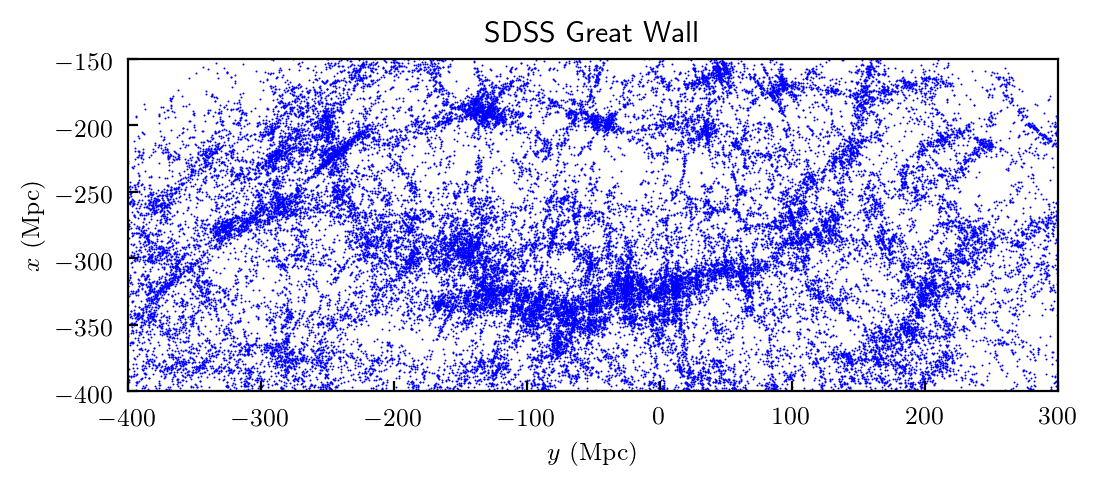

In [16]:
Mlim = -19.0

isel = (Mmeert < Mlim) 

# comoving distance (see bg01_friedmann_equations_distances notebook for information)
d_Cm = d_Lm / (1. + zm)

plot_selected(ram[isel], d_Cm[isel], title='SDSS Great Wall', color='b')
